In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from fbm.sim import cholesky
from fbm.testing.chi_square import fBm_chi_square_test

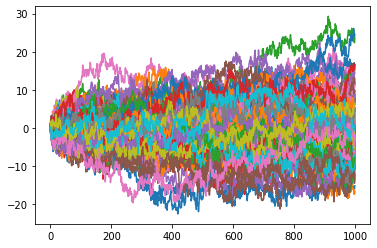

In [4]:
size = 1000
fbm_gen = cholesky.CholeskyFBmGenerator()
fbm_gen.generate_fBm(H=0.3, size=size)

for i in range(100):
    plt.plot(range(size), fbm_gen.generate_fBm(H=0.3, size=size))
plt.show()

In [23]:
contribution = np.zeros((size+1, size+1))

for i in range(size):
    contribution[i][:i+1] = fbm_gen.get_Li(i)
    contribution[i] = np.abs(contribution[i])
contribution = np.ma.masked_where(contribution == 0, contribution)

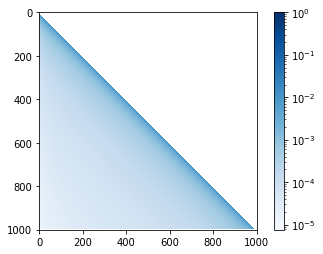

In [24]:
from matplotlib import colors
cmap = plt.cm.get_cmap("Blues").copy()
cmap.set_bad(color='white')

plt.imshow(contribution, cmap=cmap, norm=colors.LogNorm())
plt.colorbar()
plt.show()

In [28]:
l1000 = fbm_gen.get_Li(1000)
l1000

array([-7.57149025e-06, -9.70426706e-06, -1.08994220e-05, ...,
       -6.79538331e-02, -2.79592807e-01,  9.55510755e-01])

In [39]:
l999 = fbm_gen.get_Li(999)
l999 = np.insert(l999, 0, 0)
print(len(l999))

np.linalg.norm(l999 - l1000)

1001


8.165114463827755e-06

In [40]:
l500 = fbm_gen.get_Li(500)
l500 = np.insert(l500, 0, np.zeros(500))
print(len(l500))

np.linalg.norm(l500 - l1000)

1001


0.0010612988067536771

In [42]:
l750 = fbm_gen.get_Li(750)
l750 = np.insert(l750, 0, np.zeros(250))
print(len(l750))

np.linalg.norm(l750 - l1000)

1001


0.0004919718326487258

In [43]:
l1500 = fbm_gen.get_Li(1500)
l1000 = np.insert(l1000, 0, np.zeros(500))
print(len(l1000))

np.linalg.norm(l1500 - l1000)

1501


0.0004921309917522736

In [44]:
l500 = np.insert(fbm_gen.get_Li(500), 0, np.zeros(1000))
print(len(l500))

np.linalg.norm(l1500 - l500)

1501


0.0012982140123290811